# Sesi Sore
****
## End of EDA

Tugas : Lakukan EDA terhadap dataset Bank_Churn.csv

### Importing the libraries

In [1]:
# Importing Data processing libraries
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()

# Plotting Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

**Getting the data**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ilyasmuhammad07/Tugas-Ragnarok-Orbit/main/bank_churn.csv')
bank = data.copy()
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
bank['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [4]:
bank.shape

(10000, 14)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Handling Missing Values
bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
bank.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# Exploratory Data Analysis

Response variable: **Exited**

## Summary Statistics

In [9]:
bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
bank.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Dengan melihat statistik di atas, kita dapat melihat bahwa secara geografi, kebanyakan orang berasal dari Perancis. Dan kebanyakan dari mereka adalah laki-laki. Mari kita coba visualisasikan ini.

<AxesSubplot:xlabel='Geography', ylabel='count'>

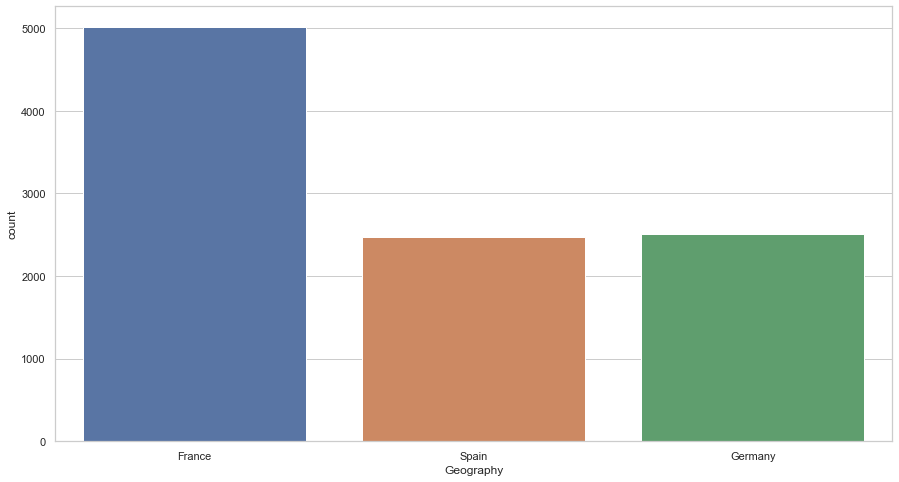

In [11]:
plt.figure(figsize=(15, 8))
sns.countplot(x=bank.Geography)

Sekarang untuk **Gender**.

<AxesSubplot:xlabel='Gender', ylabel='count'>

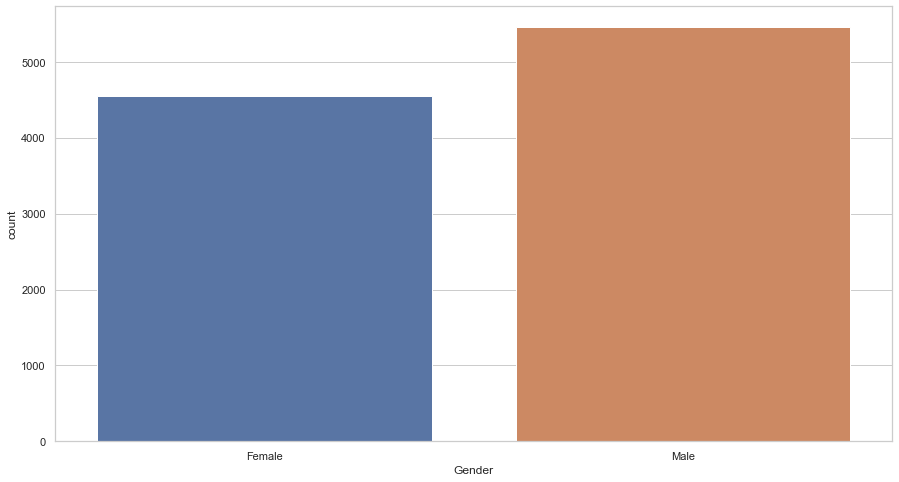

In [12]:
plt.figure(figsize=(15, 8))
sns.countplot(x=bank.Gender)

Visualisasi di atas mengatakan hal yang sama dengan ringkasan statistik.

<AxesSubplot:>

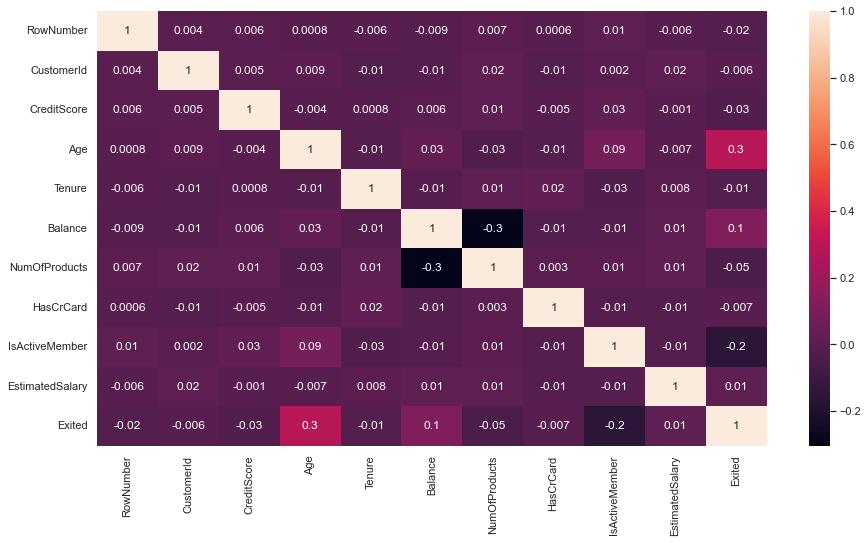

In [13]:
plt.figure(figsize=(15, 8))
sns.heatmap(data=bank.corr(), annot=True, fmt='.1g')

Tampaknya ada korelasi yang sangat sedikit di antara semua kolom. Dan tidak ada multikolinearitas yang baik.

## Discriptive Analysis

### Credit Score

Yuk cek dulu distribusi Credit Scorenya.

C:\Users\Ilyas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


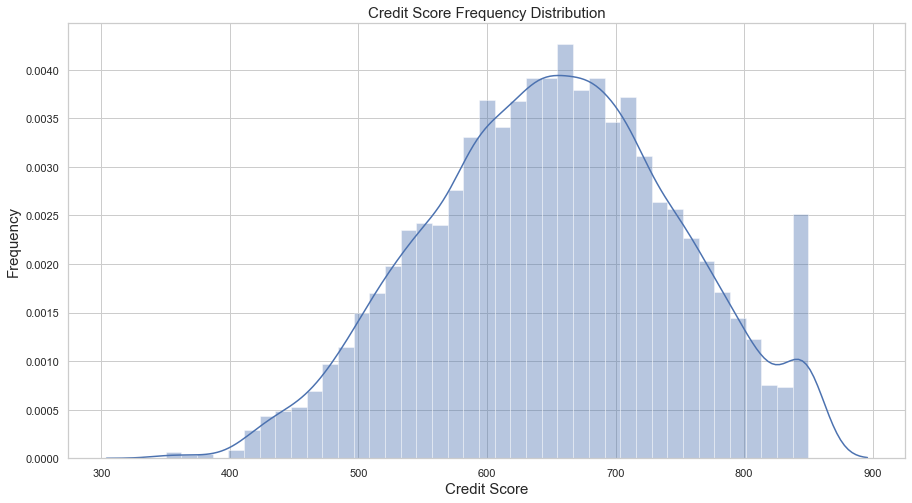

In [14]:
plt.figure(figsize=(15, 8))
sns.distplot(bank.CreditScore)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Credit Score', fontsize=15)
plt.title('Credit Score Frequency Distribution', fontsize=15)
plt.show()

Sebagian besar distribusinya antara 600 dan 700. Dan distribusinya normal (yaitu tidak miring).
****

Sekarang, mari kita coba menghubungkan Skor Kredit dengan variabel respon.

<AxesSubplot:xlabel='Exited', ylabel='count'>

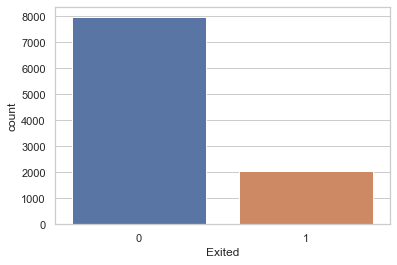

In [15]:
sns.countplot(x='Exited', data=bank)

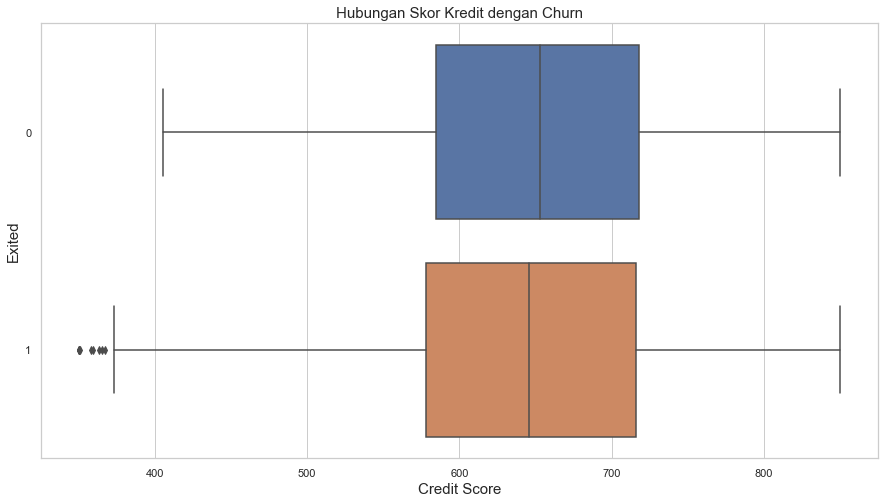

In [16]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='CreditScore', y='Exited', data=bank, orient='h')
plt.xlabel('Credit Score', fontsize=15)
plt.ylabel('Exited', fontsize=15)
plt.title('Hubungan Skor Kredit dengan Churn', fontsize=15)
plt.show()

tampaknya tidak ada hubungan yang terlihat antara skor kredit dan churn/exited.
****

Saatnya untuk analisis prediktif Churn dengan kolom ini. Mari kita coba menghubungkan Geografi dengan Churn/Exited.

<Figure size 1080x576 with 0 Axes>

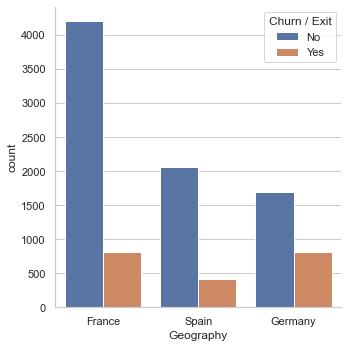

In [17]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='count', x='Geography', hue='Exited', data=bank, legend=False)
plt.legend(title='Churn / Exit', labels=['No', 'Yes'])
plt.show()

Kita bisa melihat tren serupa di semua negara.

### Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

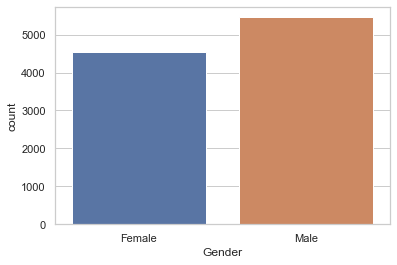

In [18]:
sns.countplot(x=bank.Gender)

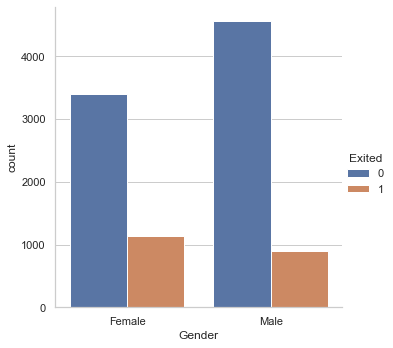

In [19]:
sns.catplot(x='Gender', hue='Exited', data=bank, kind='count')

Pada wanita maupun pria, kita dapat melihat bahwa lebih sedikit orang yang exited.
*******

### Age

In [20]:
bank.Age.dtype

dtype('int64')

In [21]:
np.sort(bank.Age.unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       88, 92], dtype=int64)

Kami memiliki orang-orang berusia antara 18 dan 92 inklusif.

Mari kita periksa kelompok usia mereka yang keluar dan yang tidak keluar.

<AxesSubplot:xlabel='Age', ylabel='Exited'>

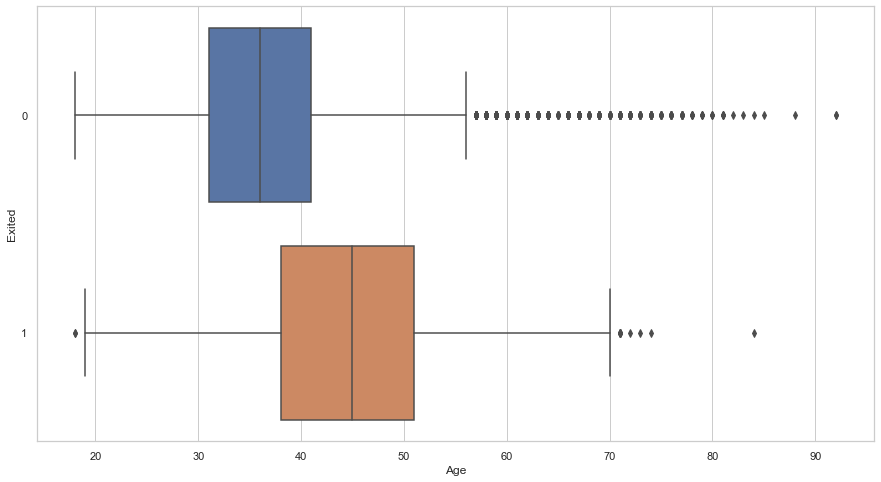

In [22]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=bank.Age, y=bank.Exited, orient='h')

Dari plot kotak di atas, kita dapat melihat bahwa kebanyakan orang tua adalah orang yang keluar.

### Tenure

Mari kita lihat lagi masa jabatannya.

Text(0, 0.5, 'Count')

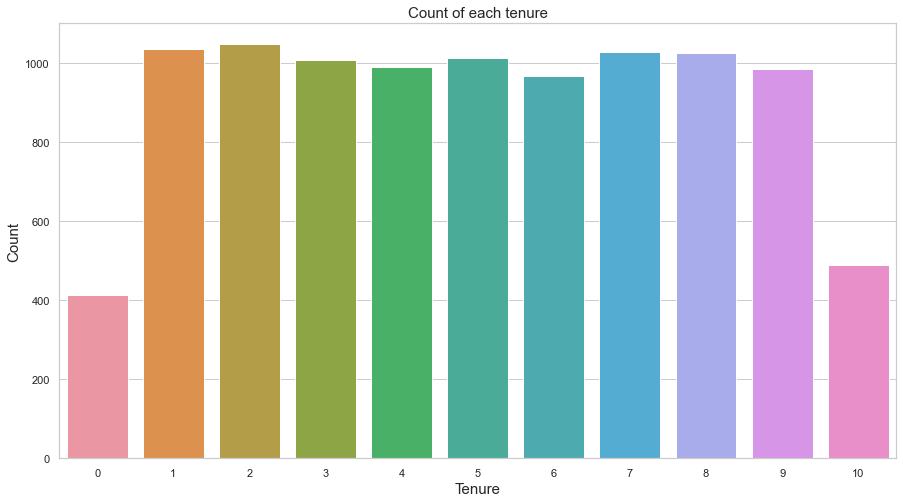

In [23]:
plt.figure(figsize=(15, 8))
sns.countplot(x=bank.Tenure)
plt.title('Count of each tenure', fontsize=15)
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Count', fontsize=15)

Sekarang, mari kita periksa berdasarkan hubungan tenurial dengan Exited.

<AxesSubplot:xlabel='Tenure', ylabel='Exited'>

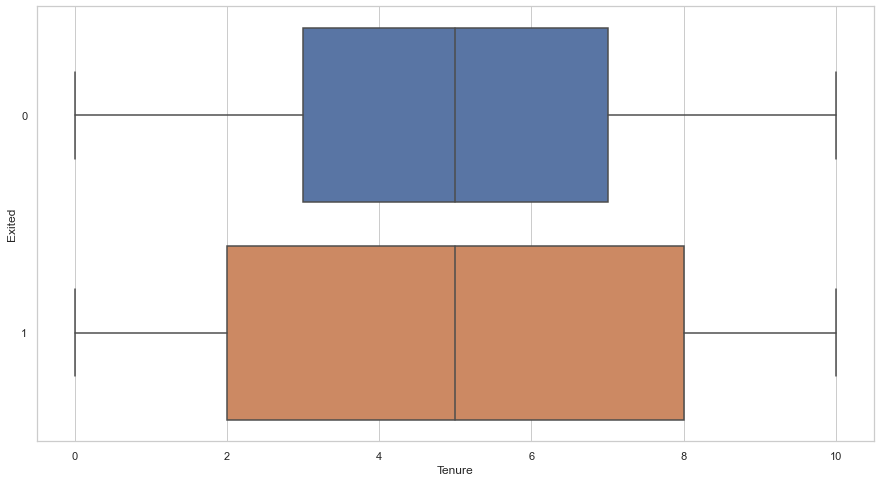

In [24]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Tenure', y='Exited', data=bank, orient='h')

**Insights**: Plot kotak agak tumpang tindih. Masa jabatan tidak terlalu penting dalam hal churn/exited.

In [25]:
bank[['Tenure', 'Exited']].corr()

,Tenure,Exited
Tenure,1.000000,-0.014001
Exited,-0.014001,1.000000


Korelasi tampaknya sangat kurang di sini.

### Balance

Mari kita periksa dulu tipe data Balance.

In [26]:
bank.Balance.dtype

dtype('float64')

In [27]:
bank.Balance.head(10)

0         0.00
1     83807.86
2    159660.80
3         0.00
4    125510.82
5    113755.78
6         0.00
7    115046.74
8    142051.07
9    134603.88
Name: Balance, dtype: float64

Mari kita periksa ini dengan variabel respon.

<AxesSubplot:xlabel='Balance', ylabel='Exited'>

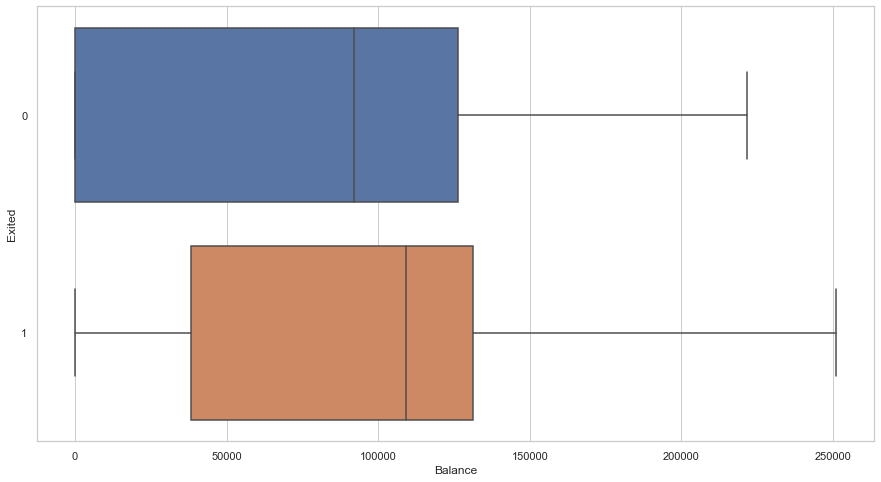

In [28]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Balance', y='Exited', data=bank, orient='h')

kita dapat melihat bahwa trennya hampir sama. Namun, beberapa yang exited berasal dari orang yang memiliki balance mencapai 250.000.

In [29]:
bank[['Balance', 'Exited']].corr()

,Balance,Exited
Balance,1.000000,0.118533
Exited,0.118533,1.000000


Sedikit korelasi dapat dilihat. Tapi itu terlalu sedikit.

([<matplotlib.axis.YTick at 0x1c8c1e05220>,
 [Text(0, 0, ''), Text(0, 0, '')])

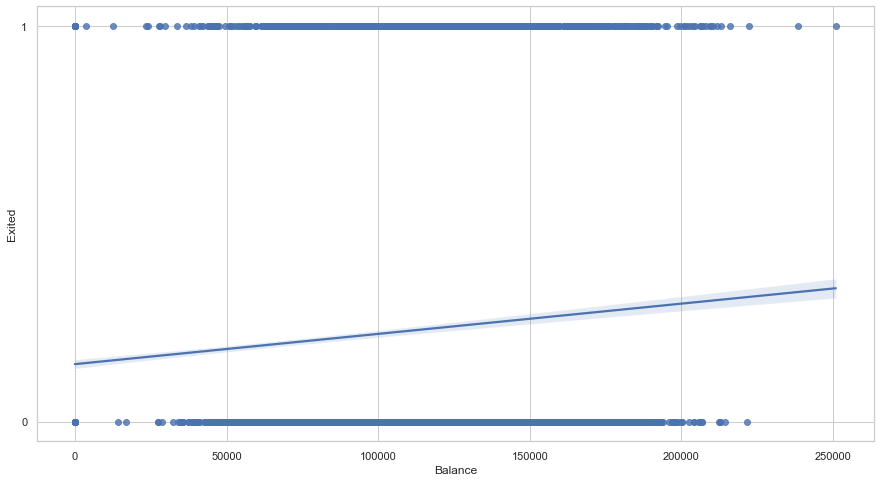

In [30]:
plt.figure(figsize=(15, 8))
sns.regplot(x=bank.Balance, y=bank.Exited)
plt.yticks([0, 1])

### Number of Products

In [31]:
bank.NumOfProducts.dtype

dtype('int64')

In [32]:
bank.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

Jadi, pelanggan memiliki minimal 1 produk dan maksimal 4 produk.

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

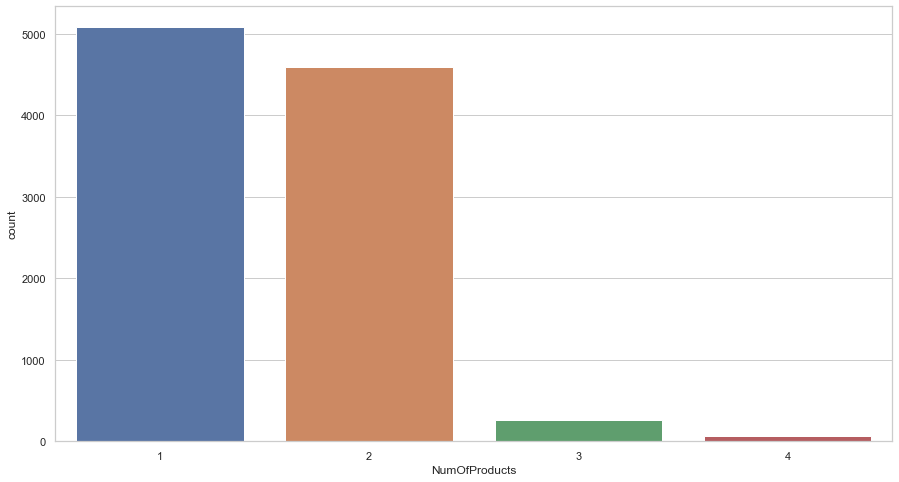

In [33]:
plt.figure(figsize=(15, 8))
sns.countplot(x=bank.NumOfProducts)

Sebagian besar pelanggan memiliki 1 atau 2 produk.

<AxesSubplot:xlabel='NumOfProducts', ylabel='Exited'>

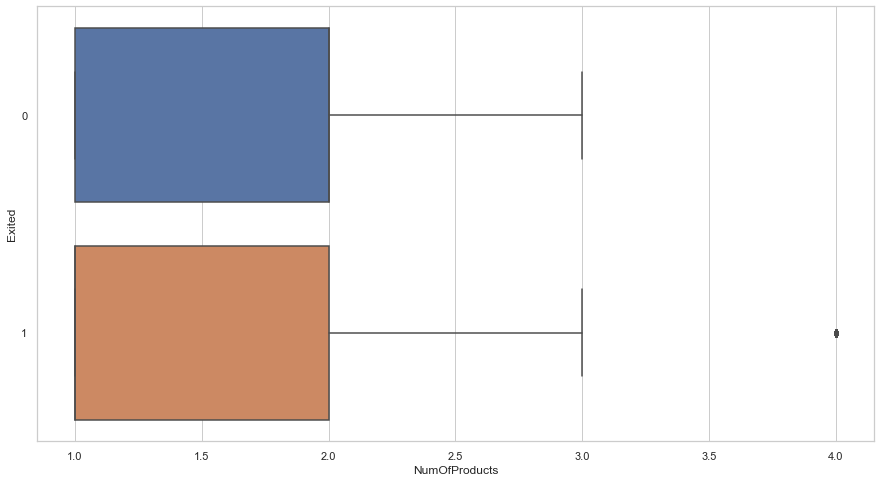

In [34]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=bank.NumOfProducts, y=bank.Exited, orient='h')

<AxesSubplot:xlabel='NumOfProducts', ylabel='Exited'>

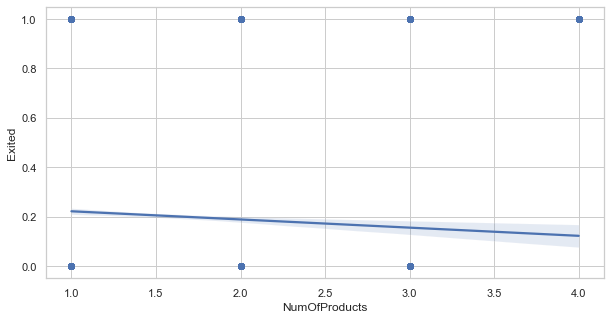

In [35]:
plt.figure(figsize=(10, 5))
sns.regplot(x=bank.NumOfProducts, y=bank.Exited)

Tidak ada korelasi antara jumlah produk yang dimiliki pelanggan dan exited nya.

### HasCrCard (Has credit card)

Mari kita periksa apakah memiliki kartu kredit memengaruhi perilaku exited pelanggan.

In [36]:
bank.HasCrCard.unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

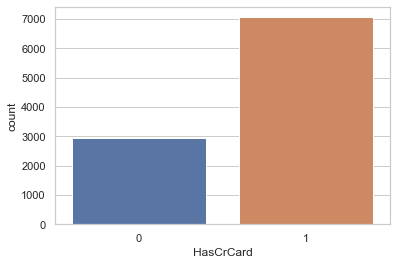

In [37]:
sns.countplot(x=bank.HasCrCard)

Lebih banyak orang memiliki kartu kredit.
****

Sekarang, mari kita periksa hubungan memiliki kartu kredit dengan exited.

<Figure size 1080x576 with 0 Axes>

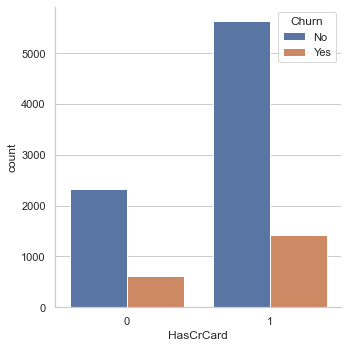

In [38]:
plt.figure(figsize=(15, 8))
sns.catplot(x='HasCrCard', hue='Exited', data=bank, kind='count', legend=False)
plt.legend(title='Churn', labels=['No', 'Yes'])

Tidak terlihat tren dalam kasus ini juga.

### Is Active Member

In [39]:
bank.IsActiveMember.dtype

dtype('int64')

In [40]:
bank.IsActiveMember.unique()

array([1, 0], dtype=int64)

<Figure size 1080x576 with 0 Axes>

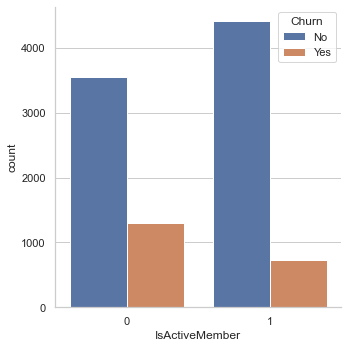

In [41]:
plt.figure(figsize=(15, 8))
sns.catplot(x='IsActiveMember', hue='Exited', data=bank, kind='count', legend=False)
plt.legend(title='Churn', labels=['No', 'Yes'])

### Estimated Salary

In [42]:
bank.EstimatedSalary.dtype

dtype('float64')

C:\Users\Ilyas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

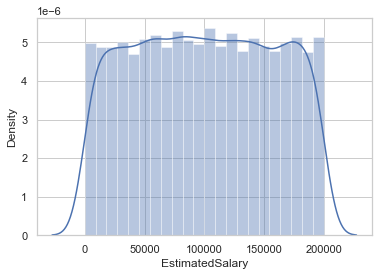

In [43]:
sns.distplot(bank.EstimatedSalary)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Exited'>

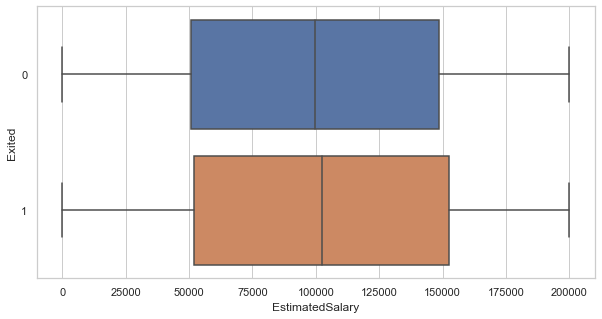

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=bank.EstimatedSalary, y=bank.Exited, orient='h')

# Conclusion

Dengan melihat data dan mengeksplorasi. Kita dapat melihat bahwa tidak ada prediktor yang memiliki hubungan dengan 'Exited' yang cukup untuk membuat prediksi.